In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA #for dimensionality reduction (PCA)

from sklearn.cluster import KMeans

# to display plots in Jupyter notebook or IPython
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D #for 3d visualization

# optional: suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("marketing_campaign.csv",sep="\t")

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
#identified the features we want
select_features = ['Year_Birth','Education','Marital_Status','Income','Dt_Customer',
               'Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts',
               'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',
               'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

#filter the database to only those features
df = df.loc[:,select_features]
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5


In [8]:
# Create a dictionary of column names and number of missing values
missing_cols = dict(df.isnull().sum())

# Filter only the columns with missing values
missing_cols = {k: v for k, v in missing_cols.items() if v != 0}

# Create a DataFrame with columns with missing values and number of missing values
missing_cols_df = pd.DataFrame(list(missing_cols.items()), columns=['Column Name', 'Number of Missing Values'])

# Print the resulting DataFrame
print(missing_cols_df)

  Column Name  Number of Missing Values
0      Income                        24


In [9]:
# Print the number of rows in the original dataframe
print(f"Number of rows before removing missing values: {len(df)}")

# Count the number of missing values in each row
num_missing = df.isnull().sum().sum()
print(f"Number of missing rows: {num_missing}")

# Remove rows with missing values
df = df.dropna()

# Print the number of rows after removing missing values
print(f"Number of rows after removing missing values: {len(df)}")

Number of rows before removing missing values: 2240
Number of missing rows: 24
Number of rows after removing missing values: 2216


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Step 1: Import necessary libraries

# Step 2: Identify numerical variables
num_vars = df.select_dtypes(include=np.number).columns

# Step 3: Calculate z-scores for numerical variables
df_zscore = df[num_vars].apply(zscore)

# Step 4: Define threshold for identifying outliers
threshold = 8

# Step 5: Count number of outliers for each numerical variable
for var in num_vars:
    outliers = (df_zscore[var] > threshold) | (df_zscore[var] < -threshold)
    num_outliers = outliers.sum()
    if num_outliers > 0:
        print('Variable:', var, '| Number of outliers:', num_outliers)

Variable: Income | Number of outliers: 1
Variable: NumWebPurchases | Number of outliers: 1
Variable: NumCatalogPurchases | Number of outliers: 3


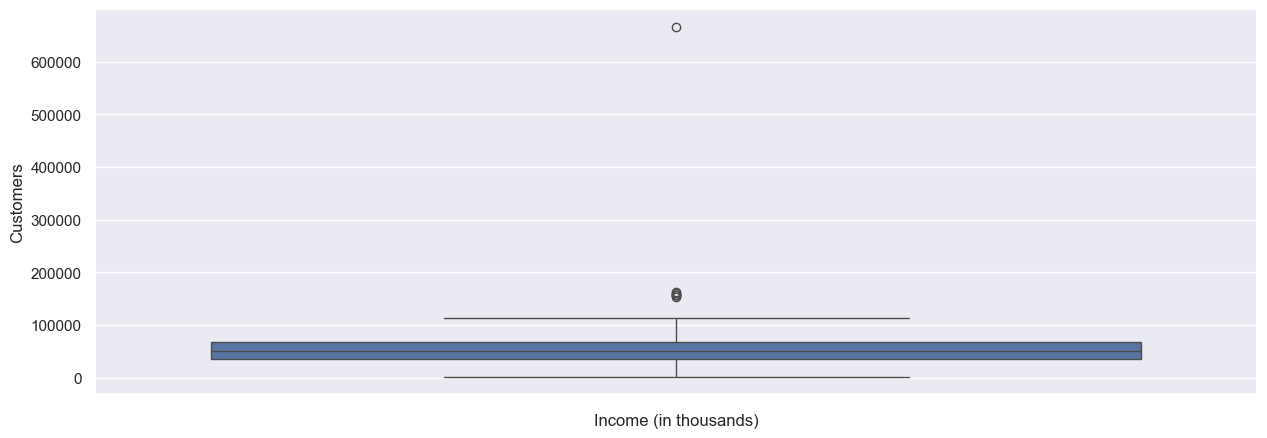

Number of customers where income is greater than 200k: 1


In [11]:
# Create a box plot
sns.set(rc={'figure.figsize':(15,5)})

#Let's create the list of features that we want a boxplot for
sns.boxplot(df['Income'])

# Set labels for the x-axis and y-axis
plt.xlabel('Income (in thousands)')
plt.ylabel('Customers')

# Display the plot
plt.show()

#let's count the number of $200k+ customers
outlier_incomes =(df['Income']>200000).sum()
# Print the result
print('Number of customers where income is greater than 200k:', outlier_incomes)

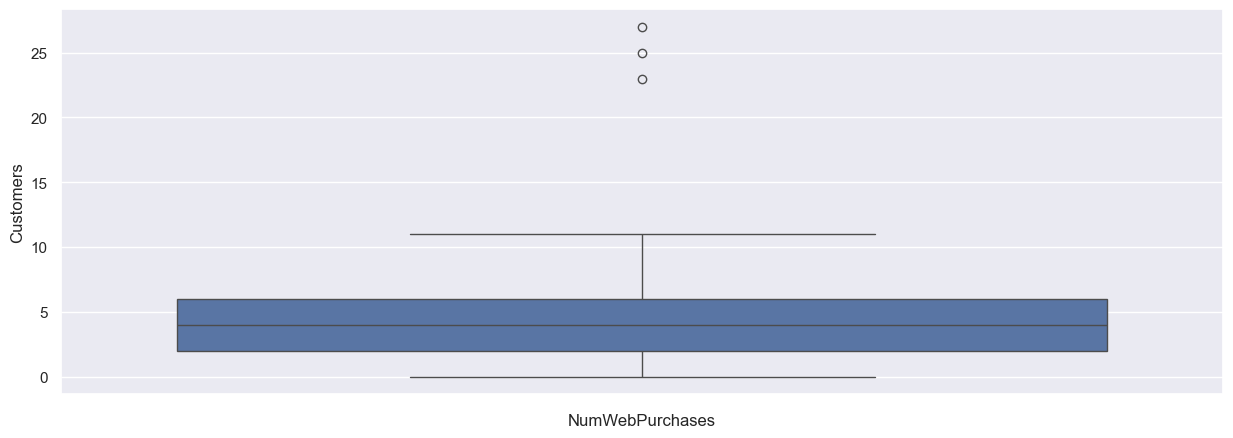

Number of customers where purchases is greater than 20: 3


In [12]:
# Create a box plot
sns.set(rc={'figure.figsize':(15,5)})

#Let's create the list of features that we want a boxplot for
sns.boxplot(df['NumWebPurchases'])

# Set labels for the x-axis and y-axis
plt.xlabel('NumWebPurchases')
plt.ylabel('Customers')

# Display the plot
plt.show()

#let's count the number of 20+ purchasers
outlier_incomes =(df['NumWebPurchases']>20).sum()
# Print the result
print('Number of customers where purchases is greater than 20:', outlier_incomes)

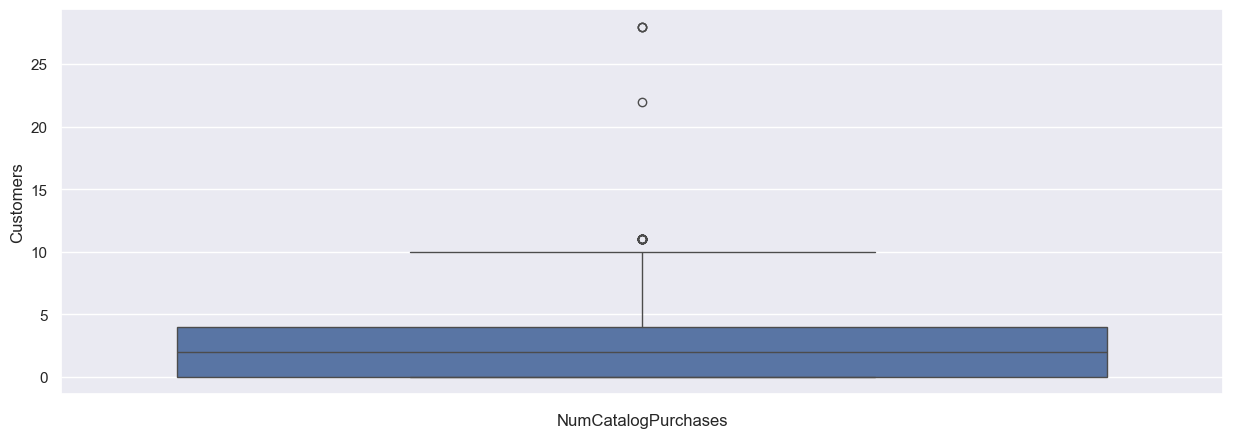

Number of customers where NumCatalogPurchases is greater than 20: 4


In [13]:
# Create a box plot
sns.set(rc={'figure.figsize':(15,5)})

#Let's create the list of features that we want a boxplot for
sns.boxplot(df['NumCatalogPurchases'])

# Set labels for the x-axis and y-axis
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Customers')

# Display the plot
plt.show()

#let's count the number of 20+ purchasers
outlier_incomes =(df['NumCatalogPurchases']>20).sum()
# Print the result
print('Number of customers where NumCatalogPurchases is greater than 20:', outlier_incomes)

In [14]:
# Print the number of rows in the original dataframe
print(f"Number of rows before removing missing values: {len(df)}")

# Count the number of missing values in each row
outlier_income = len(df[df['Income']>200000])
print(f"Number of missing rows: {outlier_income}")

# Remove rows with missing values
df = df[df['Income']<200000]

# Print the number of rows after removing missing values
print(f"Number of rows after removing missing values: {len(df)}")

Number of rows before removing missing values: 2216
Number of missing rows: 1
Number of rows after removing missing values: 2215


In [15]:
education_counts = df['Education'].value_counts()
marstatus_counts = df['Marital_Status'].value_counts()

print(education_counts)
print(marstatus_counts)

Education
Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
Marital_Status
Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [16]:
# create a nested dictionary that maps values to their replacements for each categorical feature

value_map = {
    'Education':{
        'Basic':'2n Cycle',
    },
    'Marital_Status':{
        'Alone':'Single',
        'Absurd':'Single',
        'YOLO':'Single',
        'Widow':'Divorced/Widowed',
        'Divorced':'Divorced/Widowed',
    }
}

# loop through each categorical feature in the dataframe and replace values based on the mapping

for feature_name in value_map:
    if feature_name in df.columns:
        #get the value map for the current feature
        feature_value_map=value_map[feature_name]
        
        # replace values in the current feature based on the mapping
        df[feature_name]= df[feature_name].map(feature_value_map).fillna(df[feature_name])

In [17]:
#Cust_Age = today-Year_Birth
df['Cust_Age']= 2023 - df['Year_Birth']

#Total_Sales = MntWines+ MntWines + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds
df['Total_Sales']=df['MntWines']+df['MntFruits']+ \
                            df['MntMeatProducts']+df['MntFishProducts']+ \
                            df['MntSweetProducts']+df['MntGoldProds']

#Total_Purchases = NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases
df['Total_Purchases']=df['NumDealsPurchases']+df['NumWebPurchases']+ \
                            df['NumCatalogPurchases']+df['NumStorePurchases']

#Avg_Purchase = Total_Sales/Total_Purchases
df['Avg_Purchase']=df['Total_Sales']/df['Total_Purchases']

#Deal_Share = NumDealsPurchases/Total_Purchases
df['Deal_Share']=df['NumDealsPurchases']/df['Total_Purchases']

#Web_Share = NumWebPurchases/Total_Purchases
df['Web_Share']=df['NumWebPurchases']/df['Total_Purchases']

#Catalog_Share = NumCatalogPurchases/Total_Purchases
df['Catalog_Share']=df['NumCatalogPurchases']/df['Total_Purchases']

#Store_Share = NumStorePurchases/Total_Purchases
df['Store_Share']=df['NumStorePurchases']/df['Total_Purchases']

df.head(15)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,Cust_Age,Total_Sales,Total_Purchases,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share
0,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,...,4,7,66,1617,25,64.680000,0.120000,0.320000,0.400000,0.160000
1,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,...,2,5,69,27,6,4.500000,0.333333,0.166667,0.166667,0.333333
2,1965,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,...,10,4,58,776,21,36.952381,0.047619,0.380952,0.095238,0.476190
3,1984,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,...,4,6,39,53,8,6.625000,0.250000,0.250000,0.000000,0.500000
4,1981,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,...,6,5,42,422,19,22.210526,0.263158,0.263158,0.157895,0.315789
5,1967,Master,Together,62513.0,09-09-2013,16,520,42,98,0,...,10,6,56,716,22,32.545455,0.090909,0.272727,0.181818,0.454545
6,1971,Graduation,Divorced/Widowed,55635.0,13-11-2012,34,235,65,164,50,...,7,6,52,590,21,28.095238,0.190476,0.333333,0.142857,0.333333
7,1985,PhD,Married,33454.0,08-05-2013,32,76,10,56,3,...,4,8,38,169,10,16.900000,0.200000,0.400000,0.000000,0.400000
8,1974,PhD,Together,30351.0,06-06-2013,19,14,0,24,3,...,2,9,49,46,6,7.666667,0.166667,0.500000,0.000000,0.333333
9,1950,PhD,Together,5648.0,13-03-2014,68,28,0,6,1,...,0,20,73,49,2,24.500000,0.500000,0.500000,0.000000,0.000000


In [18]:
df.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,Cust_Age,Total_Sales,Total_Purchases,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,1968.816704,51969.861400,49.024379,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684,2.322799,...,5.802257,5.318736,54.183296,607.321445,14.882619,inf,0.180495,0.267263,0.142443,0.409800
std,11.987000,21526.320095,28.949608,337.345380,39.802036,224.311559,54.760822,41.077594,51.822660,1.923820,...,3.250974,2.425863,11.987000,602.925291,7.672246,NaN,0.111001,0.098478,0.127269,0.118833
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,27.000000,5.000000,0.000000,0.533333,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35284.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,3.000000,3.000000,46.000000,69.000000,8.000000,9.714286,0.076923,0.200000,0.000000,0.333333
50%,1970.000000,51373.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,...,5.000000,6.000000,53.000000,397.000000,15.000000,23.571429,0.166667,0.260870,0.125000,0.411765
75%,1977.000000,68487.000000,74.000000,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000,3.000000,...,8.000000,7.000000,64.000000,1048.000000,21.000000,45.600000,0.250000,0.333333,0.222222,0.500000
max,1996.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,13.000000,20.000000,130.000000,2525.000000,44.000000,inf,1.000000,1.000000,1.000000,1.000000


In [19]:
df[df['Total_Purchases']==0]

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,Cust_Age,Total_Sales,Total_Purchases,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share
655,1975,Graduation,Divorced/Widowed,153924.0,07-02-2014,81,1,1,1,1,...,0,0,48,6,0,inf,NaN,NaN,NaN,NaN
981,1965,Graduation,Divorced/Widowed,4861.0,22-06-2014,20,2,1,1,1,...,0,14,58,6,0,inf,NaN,NaN,NaN,NaN
1524,1973,Graduation,Single,3502.0,13-04-2013,56,2,1,1,0,...,0,14,50,5,0,inf,NaN,NaN,NaN,NaN
2132,1949,PhD,Married,156924.0,29-08-2013,85,2,1,2,1,...,0,0,74,8,0,inf,NaN,NaN,NaN,NaN


In [20]:
df = df[df['Total_Purchases']>0]
#let's look at the data to confirm that there are no longer purchases of 0 and avg purchase = inf
df.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,Cust_Age,Total_Sales,Total_Purchases,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.00000,2211.000000,...,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,1968.822705,51919.507915,49.003618,305.774310,26.407508,167.363184,37.717775,27.088648,44.05744,2.327001,...,5.812754,5.315694,54.177295,608.408865,14.909543,32.692728,0.180495,0.267263,0.142443,0.409800
std,11.989107,21271.193929,28.950730,337.403153,39.823399,224.403412,54.787826,41.099210,51.83724,1.923018,...,3.244521,2.408661,11.989107,602.927658,7.652992,28.627628,0.111001,0.098478,0.127269,0.118833
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,27.000000,8.000000,1.000000,0.533333,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35331.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.00000,1.000000,...,3.000000,3.000000,46.000000,69.000000,8.000000,9.714286,0.076923,0.200000,0.000000,0.333333
50%,1970.000000,51373.000000,49.000000,176.000000,8.000000,68.000000,12.000000,8.000000,25.00000,2.000000,...,5.000000,6.000000,53.000000,397.000000,15.000000,23.461538,0.166667,0.260870,0.125000,0.411765
75%,1977.000000,68474.500000,74.000000,506.000000,33.000000,233.500000,50.000000,33.500000,56.00000,3.000000,...,8.000000,7.000000,64.000000,1048.500000,21.000000,45.454167,0.250000,0.333333,0.222222,0.500000
max,1996.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.00000,15.000000,...,13.000000,20.000000,130.000000,2525.000000,44.000000,186.500000,1.000000,1.000000,1.000000,1.000000


In [21]:
#identified the features we want
exclude_features = ['Year_Birth','Dt_Customer','NumDealsPurchases','NumWebPurchases',
               'NumCatalogPurchases','NumStorePurchases','Total_Purchases'] 

df = df.drop(columns=exclude_features)

df.head(15)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Cust_Age,Total_Sales,Avg_Purchase,Deal_Share,Web_Share,Catalog_Share,Store_Share
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,7,66,1617,64.680000,0.120000,0.320000,0.400000,0.160000
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,5,69,27,4.500000,0.333333,0.166667,0.166667,0.333333
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,4,58,776,36.952381,0.047619,0.380952,0.095238,0.476190
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,6,39,53,6.625000,0.250000,0.250000,0.000000,0.500000
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,42,422,22.210526,0.263158,0.263158,0.157895,0.315789
5,Master,Together,62513.0,16,520,42,98,0,42,14,6,56,716,32.545455,0.090909,0.272727,0.181818,0.454545
6,Graduation,Divorced/Widowed,55635.0,34,235,65,164,50,49,27,6,52,590,28.095238,0.190476,0.333333,0.142857,0.333333
7,PhD,Married,33454.0,32,76,10,56,3,1,23,8,38,169,16.900000,0.200000,0.400000,0.000000,0.400000
8,PhD,Together,30351.0,19,14,0,24,3,3,2,9,49,46,7.666667,0.166667,0.500000,0.000000,0.333333
9,PhD,Together,5648.0,68,28,0,6,1,1,13,20,73,49,24.500000,0.500000,0.500000,0.000000,0.000000


In [22]:
#Identify numerical features
num_features = ['Income','Recency','MntWines','MntFruits','MntMeatProducts',
 'MntFishProducts','MntSweetProducts','MntGoldProds','NumWebVisitsMonth','Cust_Age',
 'Total_Sales','Avg_Purchase','Deal_Share','Web_Share','Catalog_Share','Store_Share']

cat_features = ['Education','Marital_Status']

# apply one-hot encoding to the categorical features
df = pd.get_dummies(df, columns=cat_features)

# create a MinMaxScaler object
scaler = MinMaxScaler()

# apply the scaler to the numerical features
df[num_features] = scaler.fit_transform(df[num_features])
df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Cust_Age,...,Catalog_Share,Store_Share,Education_2n Cycle,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced/Widowed,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together
0,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.35,0.378641,...,0.400000,0.160000,False,True,False,False,False,False,True,False
1,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.25,0.407767,...,0.166667,0.333333,False,True,False,False,False,False,True,False
2,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.20,0.300971,...,0.095238,0.476190,False,True,False,False,False,False,False,True
3,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.30,0.116505,...,0.000000,0.500000,False,True,False,False,False,False,False,True
4,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.25,0.145631,...,0.157895,0.315789,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.370288,0.464646,0.474883,0.216080,0.105507,0.162162,0.450382,0.769470,0.25,0.281553,...,0.166667,0.222222,False,True,False,False,False,True,False,False
2236,0.387659,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.024922,0.35,0.485437,...,0.090909,0.227273,False,False,False,True,False,False,False,True
2237,0.343885,0.919192,0.608171,0.241206,0.125797,0.123552,0.045802,0.074766,0.30,0.145631,...,0.157895,0.684211,False,True,False,False,True,False,False,False
2238,0.420217,0.080808,0.286671,0.150754,0.124058,0.308880,0.114504,0.190031,0.15,0.388350,...,0.217391,0.434783,False,False,True,False,False,False,False,True


In [23]:
# initialize the PCA object
pca = PCA(n_components=2)  # specify the number of components you want to keep

# fit and transform the data
pca_df = pca.fit_transform(df)

# create a new DataFrame with the reduced dimensions
new_df = pd.DataFrame(data = pca_df, columns = ['PC1', 'PC2'])
new_df.head(5)

,PC1,PC2
0,-0.722017,-0.354541
1,-0.589440,-0.301568
2,-0.625949,-0.567718
3,-0.565748,-0.536431
4,0.771789,0.643199


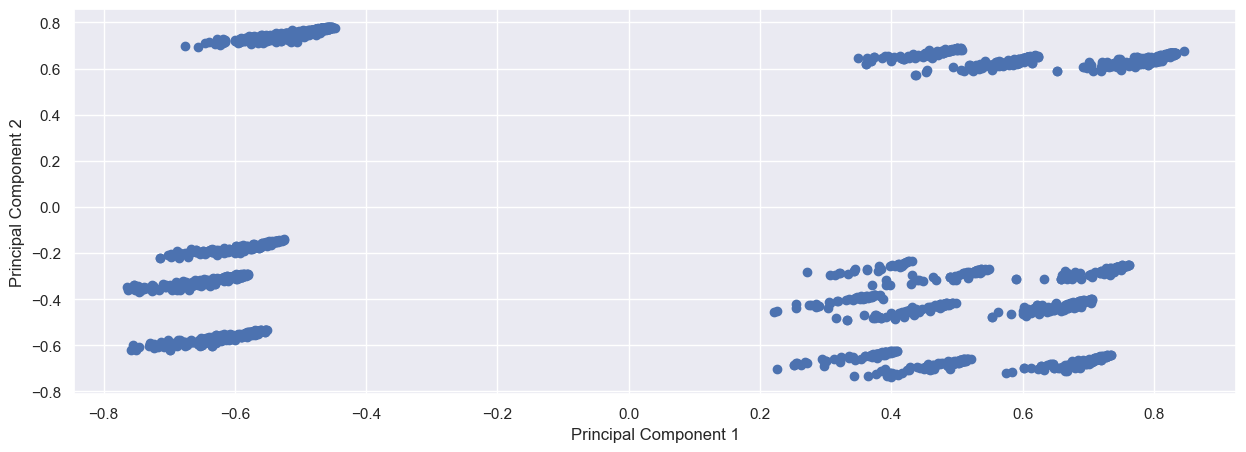

In [24]:
# create a scatter plot of the data from new_df
plt.scatter(new_df['PC1'], new_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [25]:
# initialize the PCA object
pca = PCA(n_components=3)  # specify the number of components you want to keep

# fit and transform the data
pca_df = pca.fit_transform(df)

# create a new DataFrame with the reduced dimensions
new_df = pd.DataFrame(data = pca_df, columns = ['PC1', 'PC2', 'PC3'])
new_df.head(5)

,PC1,PC2,PC3
0,-0.722016,-0.354541,0.874087
1,-0.589440,-0.301568,0.683742
2,-0.625949,-0.567718,-0.574411
3,-0.565748,-0.536431,-0.678222
4,0.771789,0.643199,-0.007398


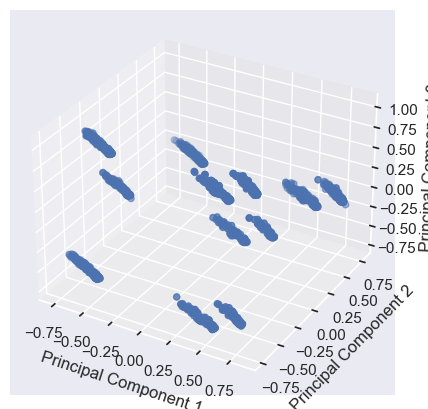

In [26]:
# create a 3D scatter plot of the data from new_df
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_df['PC1'], new_df['PC2'], new_df['PC3'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

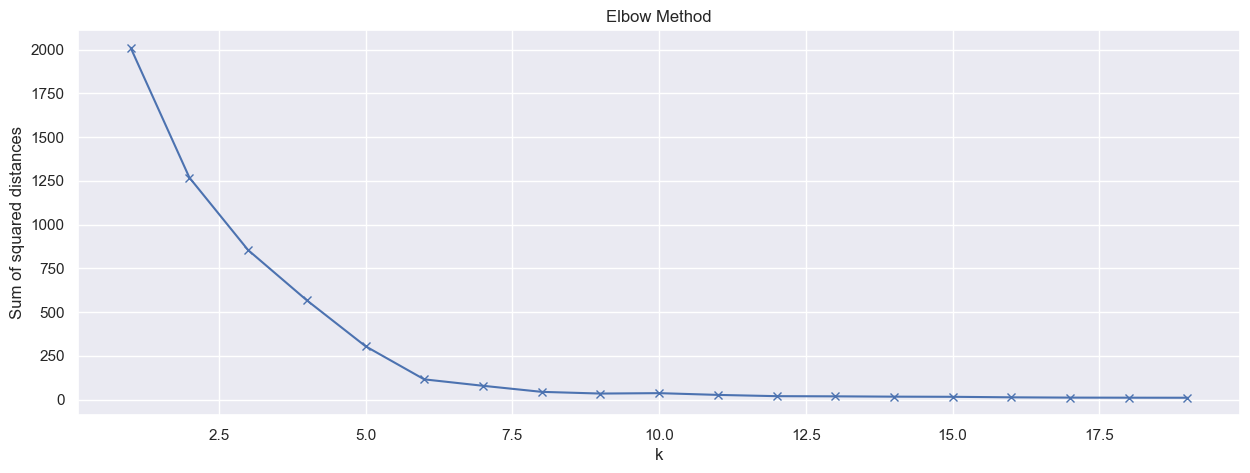

In [54]:
# Define the range of k values to test
k_values = range(1, 20)

# Calculate sum of squared distances for each k value
sum_squared_distances = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(new_df)
    sum_squared_distances.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(k_values, sum_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

In [58]:
# Specify the number of clusters to create
n_clusters = 5

# Create the KMeans model
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(df)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df['Cluster_5'] = labels

df.head(5)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Cust_Age,...,Store_Share,Education_2n Cycle,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced/Widowed,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Cluster_5
0,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.35,0.378641,...,0.160000,False,True,False,False,False,False,True,False,3
1,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.25,0.407767,...,0.333333,False,True,False,False,False,False,True,False,3
2,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.20,0.300971,...,0.476190,False,True,False,False,False,False,False,True,0
3,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.30,0.116505,...,0.500000,False,True,False,False,False,False,False,True,0
4,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.25,0.145631,...,0.315789,False,False,False,True,False,True,False,False,4


In [62]:
# Group the data by the feature of interest
grouped = df.groupby('Cluster_5')

# Calculate the mean and count of rows for each group
means = grouped.mean()
counts = grouped.size().rename('count')  # rename the column to 'count'

# Combine the mean and count dataframes
result = pd.concat([means, counts], axis=1)

# Print the result
print(result)

             Income   Recency  MntWines  MntFruits  MntMeatProducts  \
Cluster_5                                                             
0          0.313961  0.505421  0.206917   0.128246         0.096641   
1          0.299801  0.482986  0.175627   0.134322         0.088988   
2          0.310005  0.473616  0.227494   0.110775         0.095231   
3          0.316645  0.516544  0.187948   0.168058         0.107104   
4          0.347833  0.503661  0.290878   0.110367         0.108884   

           MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth  \
Cluster_5                                                                       
0                 0.151031          0.100291      0.134752           0.263811   
1                 0.146261          0.109491      0.144512           0.269715   
2                 0.130329          0.092170      0.125892           0.268620   
3                 0.170920          0.121152      0.159534           0.260902   
4               

In [66]:
selec_cols = ['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_Sales']

df_new = df[selec_cols]

df_new.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Sales
0,0.351086,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.639253
1,0.277680,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.007549
2,0.434956,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.305125
3,0.155079,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.017878
4,0.352051,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.164482


In [68]:
# Specify the number of clusters to create
n_clusters = 3

# Create the KMeans model
kmeans = KMeans(n_clusters=n_clusters,n_init=100)

# Fit the model to the data
kmeans.fit(df_new)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df_new['Cluster_5'] = labels

# Group the data by the feature of interest
grouped = df_new.groupby('Cluster_5')

# Calculate the mean and count of rows for each group
means = grouped.mean()
counts = grouped.size().rename('count')  # rename the column to 'count'

# Combine the mean and count dataframes
result = pd.concat([means, counts], axis=1)

# Print the result
print(result)

             Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster_5                                                                    
0          0.225887  0.054286   0.032986         0.019919         0.038087   
1          0.453542  0.394589   0.448463         0.263542         0.496015   
2          0.411570  0.416709   0.139404         0.156819         0.145936   

           MntSweetProducts  MntGoldProds  Total_Sales  count  
Cluster_5                                                      
0                  0.026597      0.064247     0.060163   1269  
1                  0.323211      0.268610     0.565891    389  
2                  0.124988      0.212373     0.417607    553  
